<a href="https://colab.research.google.com/github/Rashimanish/USA-Flight-Prediction/blob/main/Google%20Colab/Collecting_2022_flight_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading file: /content/Data/2022_JAN.csv
Loaded file: /content/Data/2022_JAN.csv, number of rows: 71856
Loading file: /content/Data/2022_FEB.csv
Loaded file: /content/Data/2022_FEB.csv, number of rows: 66302
Loading file: /content/Data/2022_MAR.csv
Loaded file: /content/Data/2022_MAR.csv, number of rows: 74049
Loading file: /content/Data/2022_APR.csv
Loaded file: /content/Data/2022_APR.csv, number of rows: 72211
Loading file: /content/Data/2022_MAY.csv
Loaded file: /content/Data/2022_MAY.csv, number of rows: 76398
Loading file: /content/Data/2022_JUN.csv
Loaded file: /content/Data/2022_JUN.csv, number of rows: 75201
Loading file: /content/Data/2022_JUL.csv
Loaded file: /content/Data/2022_JUL.csv, number of rows: 77921
Loading file: /content/Data/2022_AUG.csv
Loaded file: /content/Data/2022_AUG.csv, number of rows: 77596
Loading file: /content/Data/2022_SEP.csv
Loaded file: /content/Data/2022_SEP.csv, number of rows: 74395
Loading file: /content/Data/2022_OCT.csv
Loaded file: /content/D

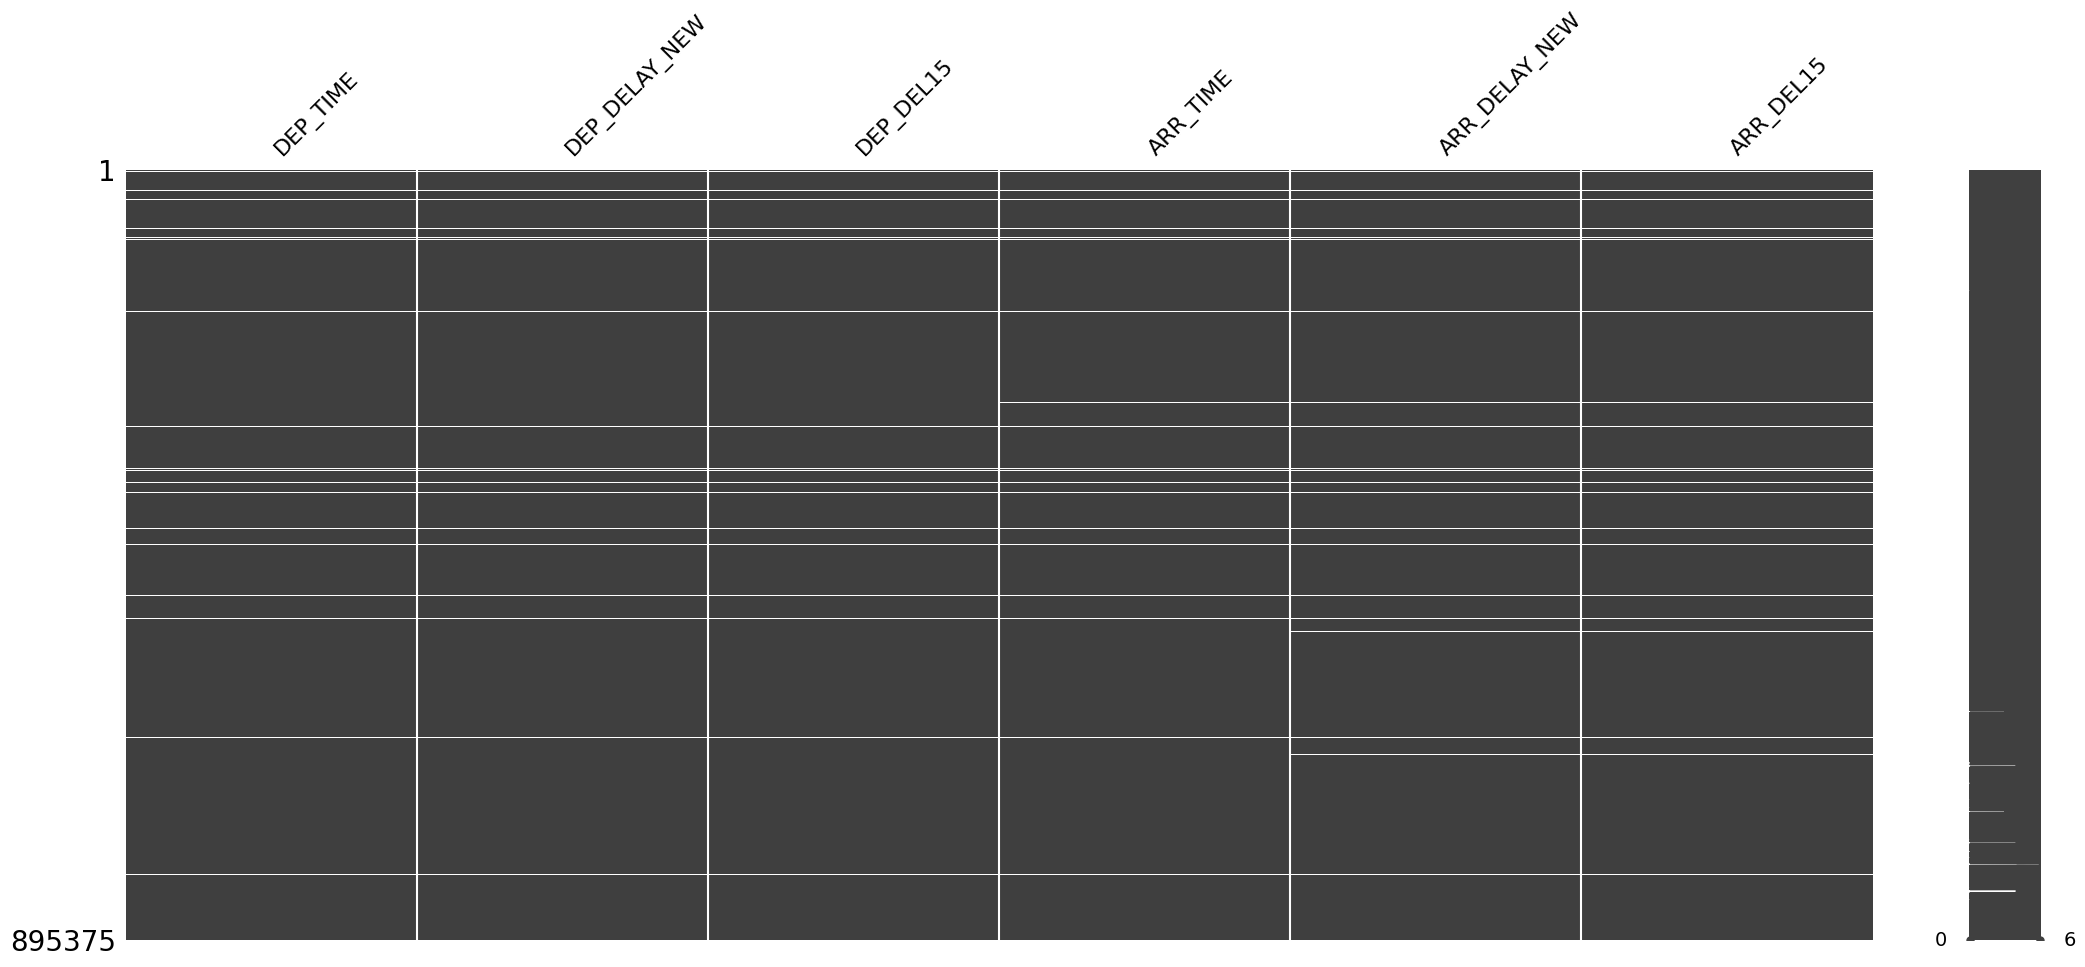

In [ ]:
import pandas as pd
import os
import missingno as msno

# Ensure the missingno library is installed
!pip install missingno

path = '/content/Data'
output_path = '/content/Data/flight_data_2022.csv'

# Selected airports and fields
airports = ('ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO')
fields = [
    "YEAR",
    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "FL_DATE",
    "ORIGIN_AIRPORT_ID",
    "ORIGIN",
    "DEST_AIRPORT_ID",
    "DEST",
    "CRS_DEP_TIME",
    "DEP_TIME",
    "DEP_DELAY_NEW",
    "DEP_DEL15",
    "CRS_ARR_TIME",
    "ARR_TIME",
    "ARR_DELAY_NEW",
    "ARR_DEL15"
]

# List of CSV files from January to December 2022
csv_files = [f'{path}/2022_{month}.csv' for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

# List to store DataFrames
df_list = []

for file in csv_files:
    if os.path.exists(file):
        try:
            print(f"Loading file: {file}")
            df = pd.read_csv(file, usecols=fields, engine='python', on_bad_lines='skip')
            df = df[df["ORIGIN"].isin(airports)]
            df = df[df["DEST"].isin(airports)]
            # Append the DataFrame to the list
            df_list.append(df)
            print(f"Loaded file: {file}, number of rows: {len(df)}")
        except pd.errors.ParserError as e:
            print(f"ParserError for file {file}: {e}")
    else:
        print(f"File {file} does not exist")

# Concatenate DataFrames
merged_df = pd.concat(df_list, ignore_index=True)

# Display missing values for specific columns before dropping rows
print("Missing values before handling:")
print(merged_df[['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE']].isnull().sum())

# Drop rows with any missing values in the specified columns
merged_df = merged_df.dropna(subset=['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE'])

# Display missing values for specific columns after dropping rows
print("\nMissing values after handling:")
print(merged_df[['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE']].isnull().sum())

# Visualize missing data
msno.matrix(merged_df[['DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15']])

# Save the merged DataFrame to a CSV file
merged_df.to_csv(output_path, index=False)

# Display the first few rows of the DataFrame
print(merged_df.head())

# Display the number of rows and columns in the DataFrame
print("\nNumber of rows and columns in the DataFrame:")
print(merged_df.shape)

# Display info about the DataFrame
print("\nDataFrame info:")
print(merged_df.info())

# Display descriptive statistics of the DataFrame
print("\nDataFrame descriptive statistics:")
print(merged_df.describe())
